In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#/kaggle/input/car-scratch-dataset/car_dent_voc/car_dent_voc/valid/

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator #
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Read data path and check files

In [4]:
train_data_path = "../input/car-scratch-dataset/car_dent_coco/car_dent_coco/train/"
test_data_path = "../input/car-scratch-dataset/car_dent_coco/car_dent_coco/test/"
valid_data_path = "../input/car-scratch-dataset/car_dent_coco/car_dent_coco/valid/"

In [5]:
import glob
# print(glob.glob(str(train_data_path)+'/*.jpg'))
#back_light-1---83-_jpg.rf.829f6df0f7e1032fac163a84da29a75e.jpg
#sign_light--19-_jpg.rf.9170ffdd1abc3028910d4592a6aa9984.jpg

size of image (h x w) 640 640


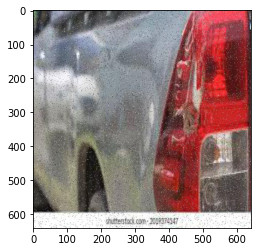

In [6]:
# looking into the the data
img = plt.imread(os.path.join(train_data_path, "back_light-1---83-_jpg.rf.829f6df0f7e1032fac163a84da29a75e.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

size of image (h x w) 640 640


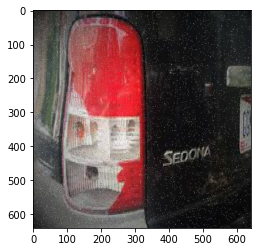

In [7]:
# looking into the the data
img = plt.imread(os.path.join(train_data_path, "sign_light--19-_jpg.rf.9170ffdd1abc3028910d4592a6aa9984.jpg"))
plt.imshow(img)
height, width, dim = img.shape
print("size of image (h x w)",height,width)

In [8]:
train_data_path

'../input/car-scratch-dataset/car_dent_coco/car_dent_coco/train/'

# Load images data

In [9]:
# train = ImageDataGenerator(rescale=1/255)
# test = ImageDataGenerator(rescale=1/255)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50

train_dataset = train.flow_from_directory(directory = '../input/car-scratch-dataset/car_dent_coco/car_dent_coco/',classes = ['train']
                                         ,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')
                                         
test_dataset = test.flow_from_directory(directory = '../input/car-scratch-dataset/car_dent_coco/car_dent_coco/',classes = ['test']
                                       ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

valid_dataset = test.flow_from_directory(directory = '../input/car-scratch-dataset/car_dent_coco/car_dent_coco/',classes = ['valid']
                                        ,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary',
        shuffle=True)

Found 3357 images belonging to 1 classes.
Found 80 images belonging to 1 classes.
Found 390 images belonging to 1 classes.


In [10]:
train_dataset.class_indices

{'train': 0}

# Train model

In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [12]:
# dimensions of our images.
img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50


model = Sequential()
model.add(Convolution2D(32, (3, 3),padding='same',input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


2022-01-02 07:43:06.482540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 07:43:06.572593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 07:43:06.573392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 640, 640, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 640, 640, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 320, 320, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 318, 318, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 318, 318, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 157, 157, 32)      9

2022-01-02 07:43:06.575185: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-02 07:43:06.576189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 07:43:06.576860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-02 07:43:06.577441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [13]:
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [14]:
history = model.fit(train_dataset, 
                    validation_data=test_dataset,
                    epochs=64,
                    callbacks=[earlystop,modelcheck],
                    batch_size=32)



2022-01-02 07:43:09.687227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/64


2022-01-02 07:43:11.908057: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


105/105 [==============================] - 97s 846ms/step - loss: 0.0061 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00001: val_accuracy improved from -inf to 1.00000, saving model to best_model.hdf5
Epoch 2/64
105/105 [==============================] - 65s 616ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: val_accuracy did not improve from 1.00000
Epoch 00002: early stopping


In [15]:
model.save('car_model.hdf5')

In [16]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [17]:
# imports


# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Loaded Model from disk


In [18]:
# from flask import Flask, render_template, request

# @app.route('/')
# def index_view():
#     return render_template('index.html')


# @app.route('/predict/',methods=['GET','POST'])
# def predict():
#     response = "For ML Prediction"
#     return response

# if __name__ == '__main__':
#     app.run(debug=True, port=8000)



In [19]:
def get_model():
    global model
    model = load_model('car_model')
    print("Model loaded!")

In [20]:
def load_image(img_path):

    img = image.load_img(img_path)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

def prediction(img_path):
    new_image = load_image(img_path)
    
    pred = model.predict(new_image)
    
    print(pred)
    
    labels=np.array(pred)
    labels[labels>=0.6]=1
    labels[labels<0.6]=0
    
    print(labels)
    final=np.array(labels)
    
    if final[0][0]==1:
        return "Bad"
    else:
        return "Good"

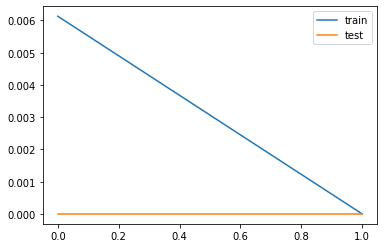

In [21]:
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend()
plt.show()

In [22]:
print('Test accuracy achieved', history.history['val_accuracy'][-2])

Test accuracy achieved 1.0


# Evaluate the model

In [23]:
model.evaluate_generator(generator=valid_dataset,
steps=32)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0, 1.0]

# Predict the output

In [24]:
test_dataset.reset()
pred=model.predict_generator(test_dataset,
steps=128,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


128/128 [==============================] - 1s 8ms/step


In [25]:
predicted_class_indices

# 0 = car damage

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [27]:
filenames=test_dataset.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# Validate Model Output

In [28]:
#Check data in validation dataset
import glob
# print(glob.glob(str(valid_data_path)+'/*.jpg'))

[[0.]]


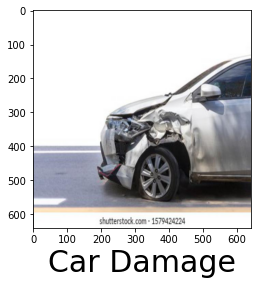

In [29]:
# Our predict function
def predictImage(filename):
    
    img = image.load_img(filename)
    plt.imshow(img)
    
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)
        
        
u = '../input/car-scratch-dataset/car_dent_coco/car_dent_coco/valid/rear_bumper-sep23---60-_jpg.rf.f20c9aeb3fa88e632b275bfccd7fdf4c.jpg'
predictImage(u)

# Deploy the model

In [30]:
!pip install fastapi uvicorn


In [31]:
from pydantic import BaseModel
from fastapi import FastAPI
import uvicorn

app = FastAPI()
 

class request_body(BaseModel):
    f_name: str

# Creating an Endpoint to receive the data
# to make prediction on.
@app.post('/predict')
def predict(data : request_body):
    # Making the data in a form suitable for prediction
        
    img = image.load_img(filename)
    plt.imshow(img)
    
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)
    return { 'class' : iris.target_names[class_idx]}
    

     
    # Return the Result
#     return { 'class' : iris.target_names[class_idx]}

# StreamLit Web app

In [ ]:
!pip install --upgrade streamlit

In [ ]:
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
def import_and_predict(image_data, model):
    
        size = (150,150) 
        image = ImageOps.fit(image_data)
#         image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        image = (image.astype(np.float32) / 255.0)

        img_reshape = image[np.newaxis,...]
#         img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
#         img_reshape = img_resize[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
    
model = tf.keras.models.load_model('car_model.hdf5')

import streamlit as st
st.write("""
         # Car Damage Detection
         """
         )
st.write("This is a simple image classification web app to predict damage")
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])    
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)
    
    if np.argmax(prediction) < 0.5:
        st.write("Car Damage!")
    elif np.argmax(prediction) >= 0.5:
        st.write("Car Not Damage!")
    
    
    st.text("Probability (0: Car_Damage, 1: Car_Not_Damage")
    st.write(prediction)

# References

*    [Tutorial-image-classification-with-keras-flow-from-directory-and-generators](https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)